# Visualizing Ford GoBike Data(2019)
## by Apurva Verma


## Introduction
FordGoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. In this project, I will perform an exploratory analysis of data provided by Ford GoBike, a bike-share system provider for the year 2019.



## Investigation Overview
In this investigation, I wanted to look at the customer behaviour characteristics of the bay Area bike share system. The main focus was on the time i.e. month, weekday and hour.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline


In [2]:
# appending all the monthly csv files for 2019 
folder_name = 'Trip'
frames = [pd.read_csv(f) for f in glob.glob(os.path.join(folder_name, '*tripdata.csv'))]
result = pd.concat(frames, ignore_index=True)
print(result.shape)
result.sample(5)

C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(2506983, 15)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
1764903,764,2019-09-24 08:28:33.8940,2019-09-24 08:41:18.3750,81.0,Berry St at 4th St,37.775880,-122.393170,22.0,Howard St at Beale St,37.789756,-122.394643,3671,Subscriber,No,NaN
1484494,319,2019-07-24 15:02:06,2019-07-24 15:07:26,NaN,NaN,37.802007,-122.271821,NaN,NaN,37.809634,-122.270117,600130,Subscriber,NaN,app
2450991,397,2019-12-06 12:10:38.7960,2019-12-06 12:17:16.3890,90.0,Townsend St at 7th St,37.771058,-122.402717,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,12450,Customer,NaN,NaN
2136843,749,2019-10-04 19:04:04.9420,2019-10-04 19:16:34.4270,16.0,Steuart St at Market St,37.794130,-122.394430,80.0,Townsend St at 5th St,37.775235,-122.397437,9740,Subscriber,No,NaN
1193321,2430,2019-06-08 13:25:07.1980,2019-06-08 14:05:38.1690,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,95.0,Sanchez St at 15th St,37.766219,-122.431060,258,Customer,No,NaN


In [5]:
df=result
sum(df.duplicated())


0

In [8]:
df1=df.copy()
df1['start_station_id']=df1['start_station_id'].astype('str')
df1['user_type'] = df1['user_type'].astype('category')
df1['bike_share_for_all_trip'] = df1['bike_share_for_all_trip'].astype('category')
df1['rental_access_method'] = df1['rental_access_method'].astype('category')
df1['bike_id'] = df1['bike_id'].astype('str')
df1['start_time'] = pd.to_datetime(df1['start_time'])
df1['end_time']=pd.to_datetime(df1['end_time'])

In [16]:
# To Create new columns which we can use to visualize the dataframe.
df1['start_date'] = df1.start_time.dt.strftime('%Y-%m-%d')
df1['start_hour'] = df1.start_time.dt.strftime('%H')
df1['day_week'] = df1.start_time.dt.strftime('%A')
df1['start_month'] = df1.start_time.dt.strftime('%B')
df1['dur_min'] = df1['duration_sec']/60
df1['dur_min'] = df1['dur_min'].astype(int)
df1.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,start_date,start_hour,day_week,start_month,dur_min
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN,2019-01-31,17,Thursday,January,1347
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN,2019-01-31,20,Thursday,January,1098
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN,2019-01-31,18,Thursday,January,1043
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN,2019-01-31,19,Thursday,January,744
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN,2019-01-31,14,Thursday,January,1011


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


## Univariate exploration

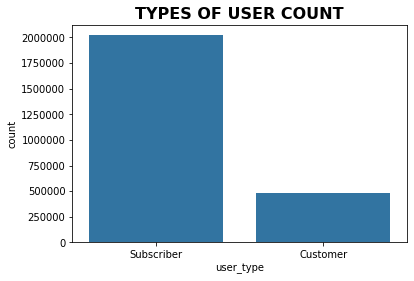

In [33]:
base_color= sb.color_palette()[0]
type_order = df['user_type'].value_counts().index
sb.countplot(data=df, x='user_type', color=base_color,order=type_order);
plt.title("TYPES OF USER COUNT",fontweight='bold', fontsize=16);

### Subscribers seem to use the service of bike rides more than the Customers. Subsrcibers usage are around 3 times more than the Customers. 

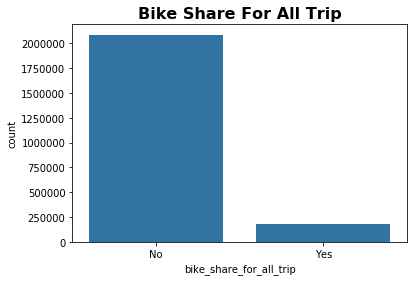

In [32]:
shared_order = df1['bike_share_for_all_trip'].value_counts().index
sb.countplot(data=df1, x='bike_share_for_all_trip', color=base_color,order=shared_order);
plt.title("Bike Share For All Trip",fontweight='bold', fontsize=16);

### Almost 90% of the users does not share the bike for all trips. The users did not prefer bike share option. 

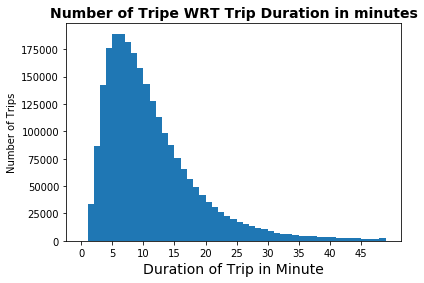

In [62]:
bins = np.arange(0, 50, 1)
ticks = np.arange(0, 50, 5)
plt.hist(data=df1, x='dur_min', bins=bins);
plt.xticks(ticks, ticks);
plt.ylabel('Number of Trips');
plt.xlabel('Duration of Trip in Minute', fontsize=14);
plt.title("Number of Tripe WRT Trip Duration in minutes", fontweight='bold',fontsize=14);

### Most of the trip duration last within the range of 5-10 minutes. Also almost none of them are used for more that a hour.

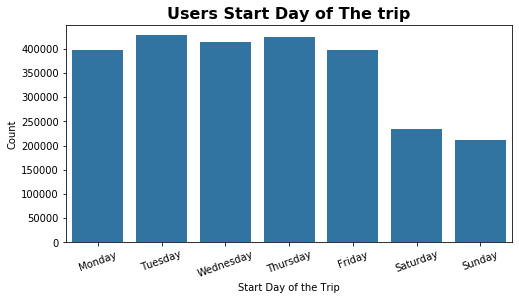

In [30]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df1['day_week'] = df1['day_week'].astype(weekdaycat)
plt.subplots(figsize = (8,4))
sb.countplot(data=df1, x='day_week', color=base_color);
plt.title('Users Start Day of The trip',fontweight='bold', fontsize=16);
plt.xlabel('Start Day of the Trip');
plt.ylabel('Count');
plt.xticks(rotation=20);

### Tuesday and Thursday have the highest frequency of users as a Start Day of Trip. While the weekends have the lowest number of users.

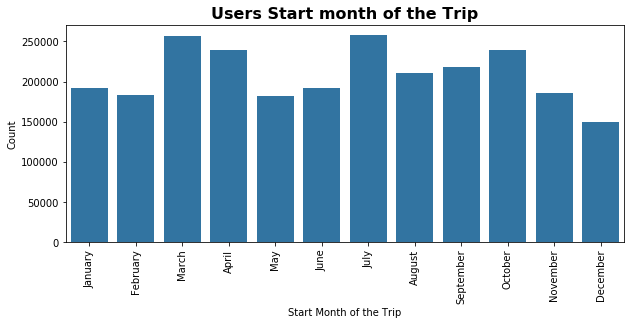

In [29]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
months_cat = pd.api.types.CategoricalDtype(ordered=True, categories=months)
df1['start_month'] = df1['start_month'].astype(months_cat)
plt.subplots(figsize = (10,4))
sb.countplot(data=df1, x='start_month', color=base_color);
plt.title('Users Start month of the Trip',fontweight='bold', fontsize=16);
plt.xlabel('Start Month of the Trip');
plt.ylabel('Count');
plt.xticks(rotation=90);

###  April and July are the months when the user count is the most while December has the lowest count.

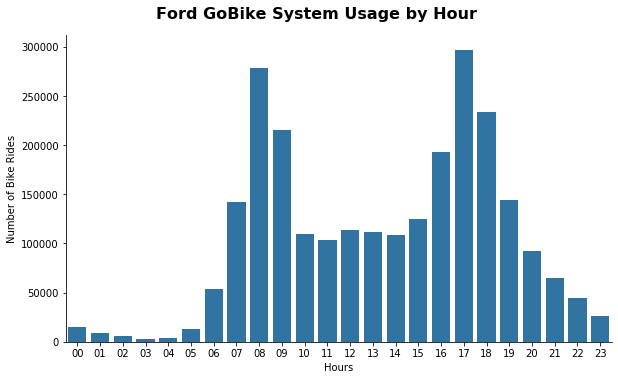

In [34]:
# Hourly usage of the Ford Go Bike System
graph = sb.catplot(data = df1, x='start_hour', kind='count', color = base_color, aspect = 1.7)
graph.set_axis_labels('Hours', 'Number of Bike Rides')
graph.fig.suptitle('Ford GoBike System Usage by Hour', y=1.05, fontsize=16, fontweight='bold');

### The morning that is at 8am and the evening 5pm are the hours where the bikes are most used.

## Bivariate exploration


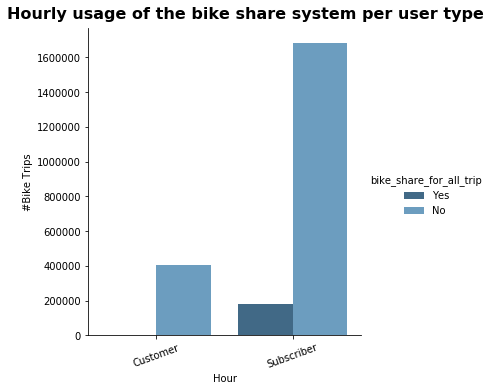

In [64]:
# hourly usage of the bike
df_hr = sb.catplot(data=df1, x='user_type', hue='bike_share_for_all_trip',hue_order=['Yes','No'], kind='count', sharey = False,palette="Blues_d")
df_hr.set_axis_labels("Hour", "#Bike Trips")
df_hr.set_titles("{col_name}")
df_hr.fig.suptitle('Hourly usage of the bike share system per user type', y=1.03, fontsize=16, fontweight='bold');
plt.xticks(rotation=20);

### Around 200000 Subscribers and none of the Customers use the bike for all trip. While more than 1600000 Subscribers and only 400000 Customers share their bike for all trip.

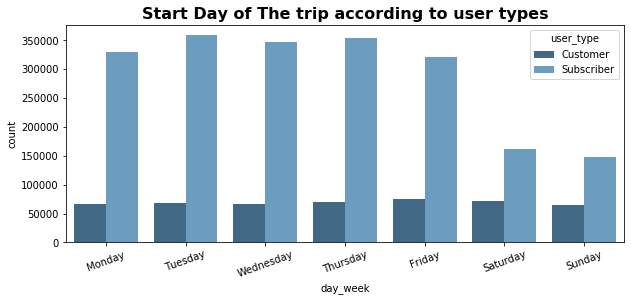

In [65]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.subplots(figsize = (10,4))
sb.countplot(data= df1, x='day_week', hue='user_type',palette="Blues_d");
plt.title('Start Day of The trip according to user types',fontweight='bold', fontsize=16);
plt.xticks(rotation=20);

### For every day of week the Subscriber usage is more than Customer's bike usage. Also it is very evident here that the Customer's usage is nearly constant without much fluctuations for all days of the week.

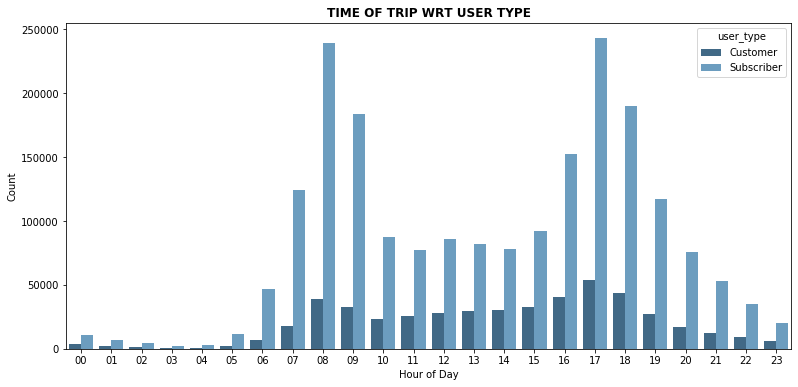

In [52]:
plt.subplots(figsize = (13,6))
sb.countplot(data=df1, x='start_hour', hue='user_type', palette="Blues_d")
plt.title('TIME OF TRIP WRT USER TYPE',fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Count');


### Subscribers usage of the bikes is obviously at the rush hours , this provides evidence that they use the service on the purpose of going to work. The customers tend to ride most in the noon or evenings.

## Multivariate Exploration


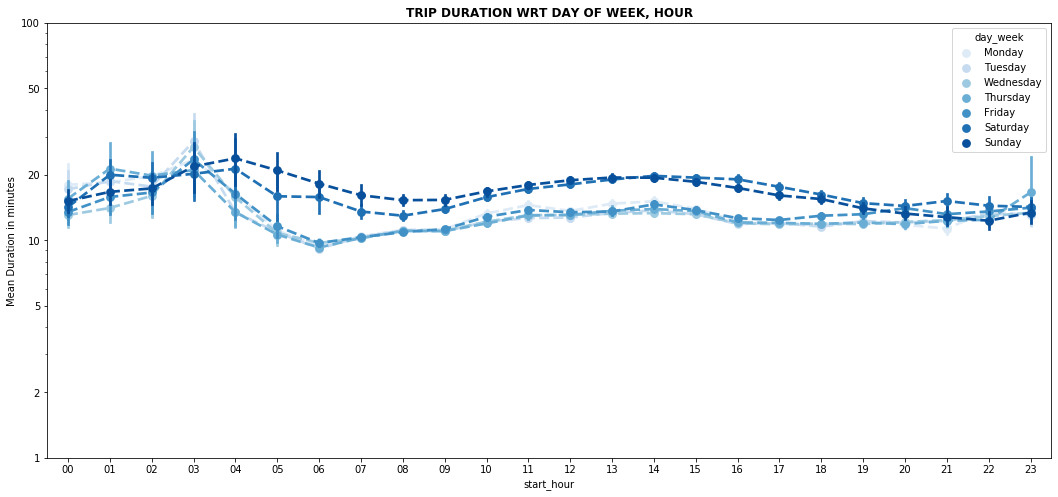

In [56]:
plt.subplots(figsize = (18,8))
ax = sb.pointplot(data = df1, x = 'start_hour', y = 'dur_min', hue = 'day_week',palette = 'Blues', linestyles = '--')
plt.title('TRIP DURATION WRT DAY OF WEEK, HOUR', fontweight='bold')
plt.ylabel('Mean Duration in minutes')
plt.yscale('log')
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100])
ax.set_yticklabels([],minor = True);


### Subscribers rides are much shorter compared to those of the customers on everyday of the week. The trend line seems to increase on weekends, especially for customer user type .

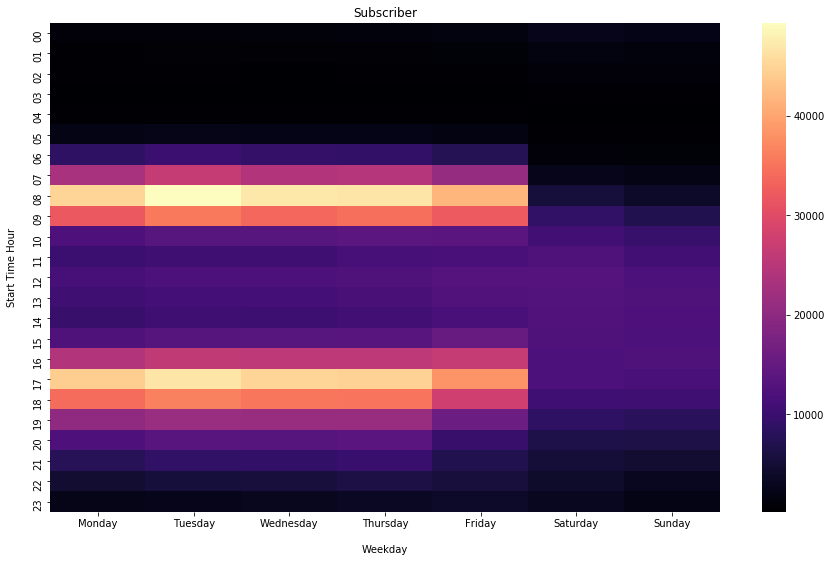

In [59]:
# Heatmap - Subscribers
plt.figure(figsize=(15,9))
df_sub = df1.query('user_type == "Subscriber"').groupby(['start_hour', 'day_week'])['bike_id'].size().reset_index();
df_sub = df_sub.pivot('start_hour', 'day_week', 'bike_id')
hot_map = sb.heatmap(df_sub, cmap = 'magma')
plt.title("Subscriber", y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour', labelpad = 16);
plt.show()

### The heatmap represents the Subscribers weekly distribution for Start Time of the hour. Most of the Subscribers prefer to start their ride between 7-9am in morning and 4-6pm at evening. Weekend activity of Subscribers are not very strong here.



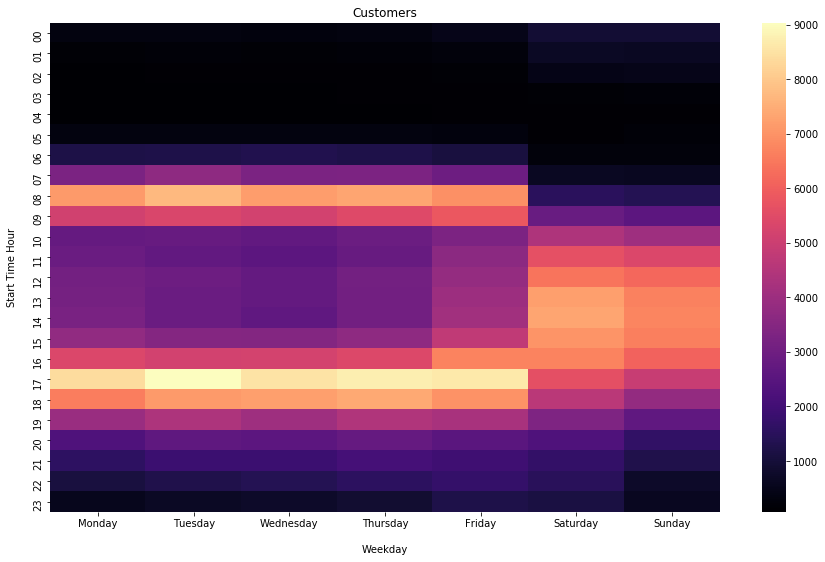

In [58]:
# Heatmap - Subscribers
plt.figure(figsize=(15,9))
df_cus = df1.query('user_type == "Customer"').groupby(['start_hour', 'day_week'])['bike_id'].size().reset_index();
df_cus = df_cus.pivot('start_hour', 'day_week', 'bike_id')
hot_map = sb.heatmap(df_cus, cmap = 'magma')
plt.title("Customers", y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour', labelpad = 16);
plt.show()

### The heatmap represents the Customers weekly distribution for Start Time of the hour. Most of the Customers prefer to start their ride between 8-9am in morning and 4-7pm at evening. Also during weekends they ride between 11am-6pm. 

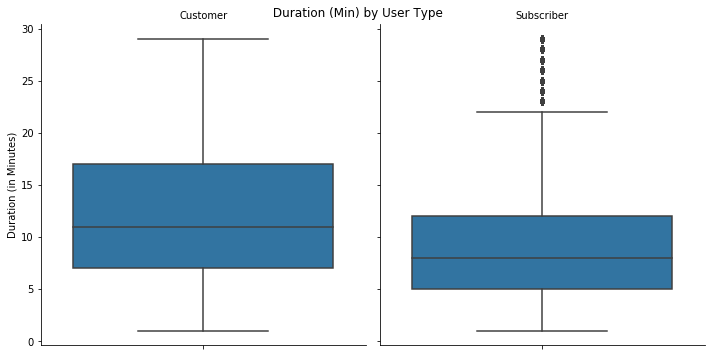

In [66]:
data_ = df1.query('dur_min < 30')
g = sb.catplot(data=data_, y='dur_min', col="user_type", kind='box');
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration (in Minutes)")
g.fig.suptitle(' Duration (Min) by User Type');

<Figure size 841.68x595.44 with 0 Axes>

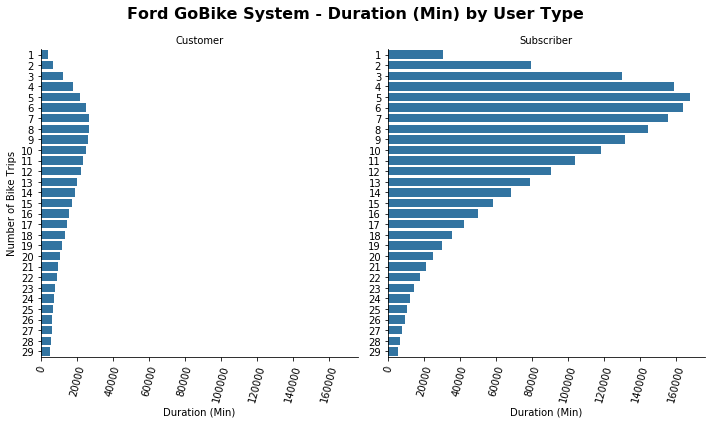

In [67]:
# Customer Usage by Duration vs. Subscriber Usage by Duration
plt.figure(figsize=[ 11.69, 8.27]);
data = df1.query('dur_min < 30')
graph = sb.catplot(data=data, y = 'dur_min', col='user_type', kind='count', sharey = False, color = base_color);
graph.set_axis_labels('Duration (Min)', 'Number of Bike Trips')
graph.set_titles('{col_name}')
graph.fig.suptitle('Ford GoBike System - Duration (Min) by User Type', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

### By comparing both the box plots we conclude that the ride duration(in minutes) for Customer typically have trip durations that are longer (8 to 18 minutes ) than for subscribers (5 to 12 ).

# CONCLUSIONS:
#### In this project I've investigated the dataset of FordGoBike Data for the year 2019(January-December) and from the visualization drawn few conclusion listed below.

1. From the two user types of FordGoBike data, the counts of Subscribers are around 3 times more than the Customers. 

2. 90% of the users tend to share their bike for all trips in which only Subscribers contribute. None of the Customers tend to share their bike for all trips.
 
3. As a Start Day of the Trip, Tuesday and Thursday have the highest frequency of users. While the weekends have the lowest number of users. 

4. April and July are the months when the user count is the most while December has the lowest count.

5. Most of the trip duration last within the range of 5-10 minutes.
 
6. For different hours of the day, at 8am in morning and the evening 5pm are the hours where the bikes are most used by the users.

7. Subscribers rides are much shorter compared to those of the customers on everyday of the week. The trend line seems to increase on weekends, especially for customer user type .

8. The heatmap represents the Subscribers weekly distribution for Start Time of the hour. Most of the Subscribers prefer to start their ride between 7-9am in morning and 4-6pm at evening. Weekend activity of Subscribers are not very strong. The Customers weekly distribution for Start Time of the hour. Most of the Customers prefer to start their ride between 8-9am in morning and 4-7pm at evening. Also during weekends they ride between 11am-6pm.
 
9. Most of the trip duration last within the range of 5-10 minutes. Also almost none of them are used for more that a hour. The box plots we have conclude that the ride duration(in minutes) for Customer typically have trip durations that are longer (8 to 18 minutes ) than for subscribers (5 to 12 ).

# Limitations

1.The rental_access_method column does not have enough values to draw some conclusion from them.  
2.The Gender wise bike distribution could give a more percise insights for the data.  
3.Overlaying external data sources onto this data set such as traffic or weather could allow us to better understand influencers on number of users.
